C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


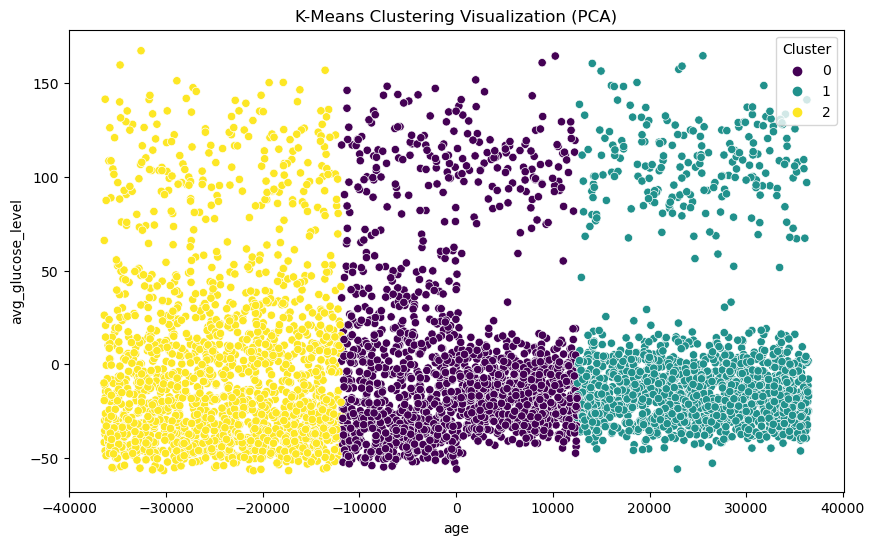

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "ml_dataset.csv"
data = pd.read_csv(file_path)
data = data.drop(columns=['gender','work_type','ever_married','Residence_type','smoking_status']) 
features = data.drop(columns=["stroke"])
imputer = SimpleImputer(strategy="mean")
features_imputed = imputer.fit_transform(features)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_imputed)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_imputed)
df_pca = pd.DataFrame(features_pca, columns=["age", "avg_glucose_level"])
df_pca["Cluster"] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="avg_glucose_level", hue="Cluster", data=df_pca, palette="viridis", legend="full")
plt.title("K-Means Clustering Visualization (PCA)")
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

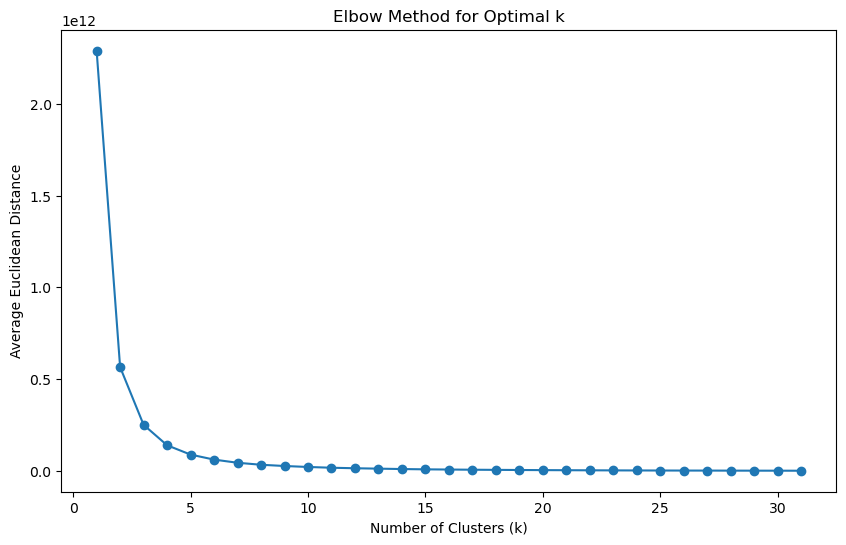

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
file_path = "ml_dataset.csv"
data = pd.read_csv(file_path)
data = data.drop(columns=['gender','work_type','ever_married','Residence_type','smoking_status']) 
features = data.drop(columns=["stroke"]) 
imputer = SimpleImputer(strategy="mean")
features_imputed = imputer.fit_transform(features)
k_values = range(1, 32)
distortions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_imputed)
    distortions.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

Acluster = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
Acluster.fit(X_train)
Acluster_y_preds = Acluster.fit_predict(X_test)
Acluster_preds = pd.DataFrame({"Predicted":Acluster_y_preds,"Actual":y_test})
Acluster_preds

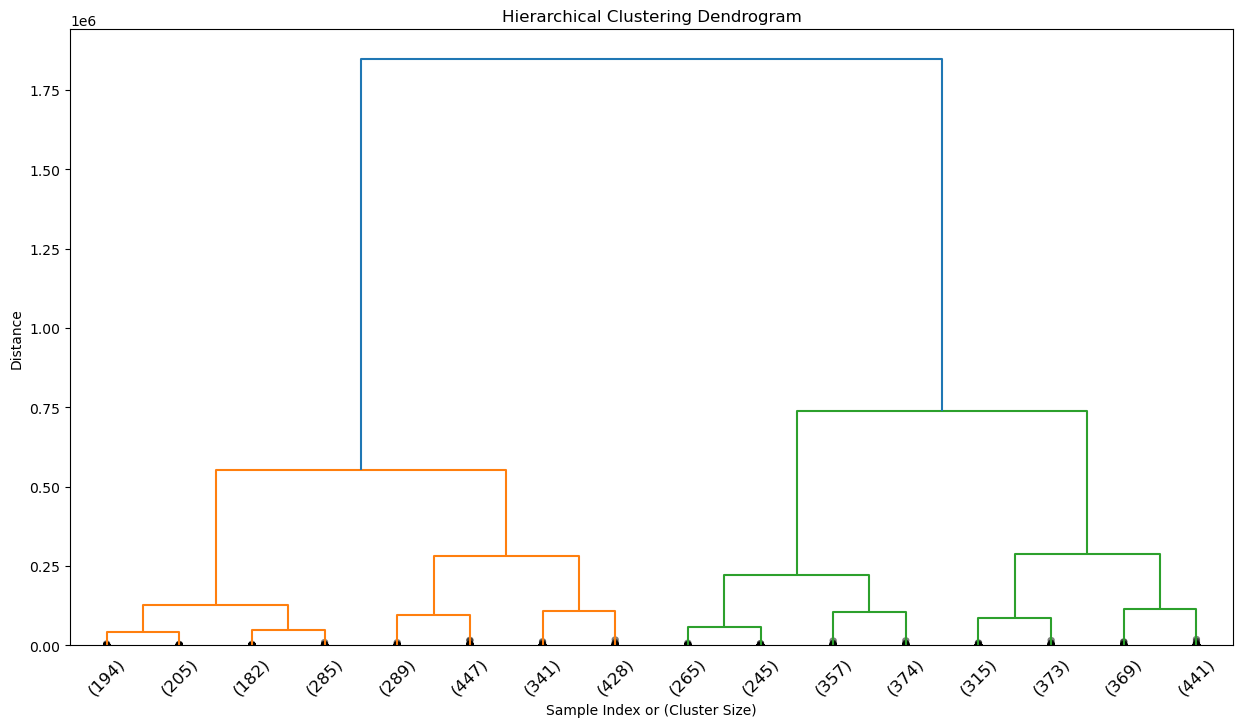

In [8]:
#3
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
file_path = "ml_dataset.csv"
data = pd.read_csv(file_path)
data = data.drop(columns=['gender','work_type','ever_married','Residence_type','smoking_status'])
features = data.drop(columns=["stroke"]) 
imputer = SimpleImputer(strategy="mean")
features_imputed = imputer.fit_transform(features)
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
clusters = agg_cluster.fit_predict(features_imputed)
linkage_matrix = linkage(features_imputed, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=45, leaf_font_size=12, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

Number of features needed to capture 95% of data variance: 1


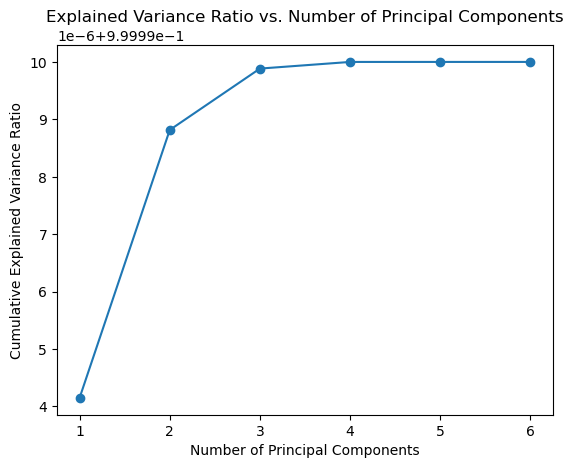

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
file_path = "ml_dataset.csv"
data = pd.read_csv(file_path)
data = data.drop(columns=['gender','work_type','ever_married','Residence_type','smoking_status'])
features = data.drop(columns=["stroke"]) 
imputer = SimpleImputer(strategy="mean")
features_imputed = imputer.fit_transform(features)
pca = PCA()
features_pca = pca.fit_transform(features_imputed)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components_95_percent = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of features needed to capture 95% of data variance:", num_components_95_percent)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
file_path = "ml_dataset.csv"
data = pd.read_csv(file_path)
data = data.drop(columns=['gender','work_type','ever_married','Residence_type','smoking_status'])
features = data.drop(columns=["stroke"]) 
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
pca = PCA(n_components=num_components_95_percent)
X_pca = pca.fit_transform(X_imputed)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using transformed dataset:", accuracy)

Accuracy using transformed dataset: 0.8953033268101761
